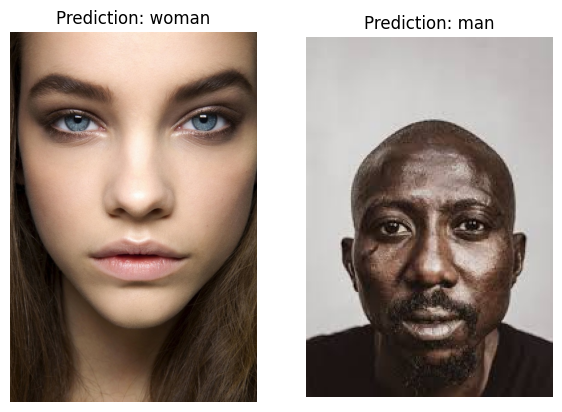

In [8]:
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from PIL import Image
from torch import nn
import torchvision
import numpy as np
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

images = datasets.ImageFolder(root='C:/Users/Anyone/Desktop/GenderClassification', transform=transform)

idx_to_class = {v: k for k, v in images.class_to_idx.items()}

model = nn.Sequential(
    nn.Conv2d(3, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(128, 256, kernel_size=3, padding=1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(256 * 16 * 16, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 2),
    nn.Softmax(dim=1)
).to(device)

model.load_state_dict(torch.load('C:/Users/Anyone/Desktop/GenClass128saves/GenClass128Weights_3_4.pth'))

img1 = Image.open('C:/Users/Anyone/Downloads/8.jpg')
img2 = Image.open('C:/Users/Anyone/Downloads/11.jpg')

img_tensor1 = transform(img1).unsqueeze(0).to(device)
img_tensor2 = transform(img2).unsqueeze(0).to(device)

model.eval()
with torch.no_grad():
    output1 = model(img_tensor1)
    output2 = model(img_tensor2)

_, predicted1 = torch.max(output1.data, 1)
_, predicted2 = torch.max(output2.data, 1)

fig, axs = plt.subplots(1, 2, figsize=(7,7))

axs[0].imshow(img1)
axs[0].set_title(f'Prediction: {idx_to_class[predicted1.item()]}')
axs[0].axis('off')

axs[1].imshow(img2)
axs[1].set_title(f'Prediction: {idx_to_class[predicted2.item()]}')
axs[1].axis('off')

plt.show()